In [ ]:
from IPython.display import HTML; HTML(f"""<style>{open("./styles/styles.css").read()}</style>""")

<center>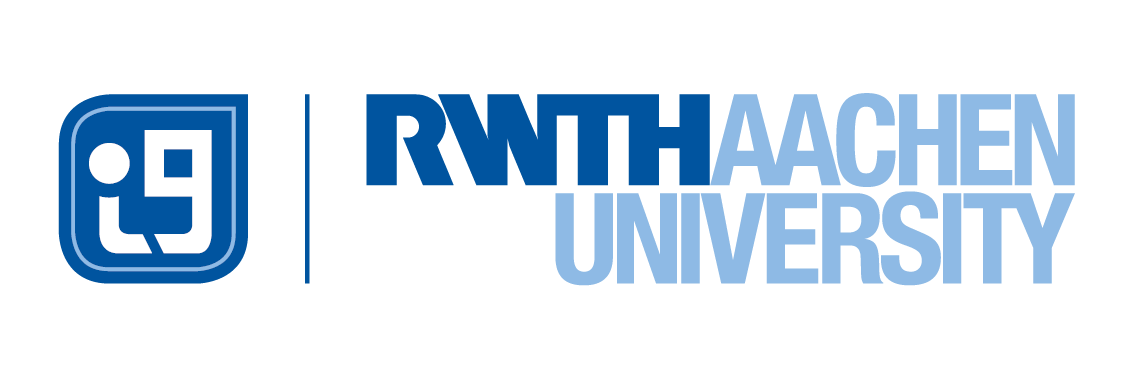</center>

---
<a name="top"></a>
# Introduction into Python
## Overview
* [How to Run Code in JupyterLab](#coderunning)
* [Course Overview](#course)
* [Analyzing the Statistics of Songs on Spotify and YouTube](#songs_statistics)

---
<a name="coderunning"></a>
## [How to Run Code in JupyterLab](#top)

#### <b>1. Select a Code Cell</b>  
A Jupyter notebook is composed of cells, and you can identify code cells by the <code>In [ ]:</code> prompt on the left side.  
Click on a code cell to select it, or use the arrow keys to navigate.  

#### <b>2. Run the Code Cell</b>  
Once you have a code cell selected, you can run the code inside it. There are several ways to do this:  

* **Press** <code>Shift + Enter</code>: Runs the current cell and moves to the next one (or creates a new cell if none exists).  
* **Click the "Run" button**: Located in the toolbar, it looks like a "play" button (<code>▶</code>).  
* **Use the "Run" menu**: Select **"Run Selected Cells"** to execute the chosen code cell.  

#### <b>3. View Output</b>  
After running a code cell, any output generated by the code (e.g., print statements, plots, tables) will appear directly below the cell.  

#### <b>4. Continue Running Cells</b>  
You can keep executing code cells, either by selecting them manually or using keyboard shortcuts.  

#### <b>5. Save Your Work</b>  
To avoid losing progress, save your notebook periodically:  

* Click the **Save** button in the toolbar.  
* Use the shortcut <code>Ctrl + S</code> (Windows/Linux) or <code>Cmd + S</code> (Mac).  

---
<a name="course"></a>
## [Course Overview](#top)

* Introduction
* Data Structures
* Control Statements
* Functions
* External Modules & Reference Semantic
* Functional Programming & Iterators
* File Handling & Exceptions
* Pandas
* NumPy
* Matplotlib

---
<a name="songs_statistics"></a>
## [Analyzing the Statistics of Songs on Spotify and YouTube](#top)

This project utilizes Python to analyze a dataset of <b>20,000+ songs</b> from <b>Spotify and YouTube</b>.
The goal is <b>to identify the characteristics of the most popular tracks and extract insights for predicting music hits.</b>

We will explore key features such as:
* <b>Audio properties</b> (rhythm, energy, loudness)
* <b>Popularity metrics</b> (streams, views, likes)

The findings can be used to forecast the success of new songs and develop data-driven models for music analytics.

<a name="data_preprocessing"></a>
## Data Preprocessing

First, we load the necessary libraries and read the dataset:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./data/Spotify_Youtube.csv")
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


Next, we check the number of rows in the dataset and compute the **average song duration**:

In [9]:
print("Total rows in the dataset:", len(df))
avg_duration = df["Duration_ms"].mean()
print("On average, a song is {:.2f} minutes long".format(avg_duration / 60000))

Total rows in the dataset: 20718
On average, a song is 3.75 minutes long


To analyze the data in more detail, we first need to clean it by removing irrelevant columns such as URLs that are not essential for our analysis. Specifically, we will drop columns like "Unnamed: 0", "Url_spotify", "Uri", and "Url_youtube", which don't provide useful information for our task:

In [10]:
df.drop(["Unnamed: 0", "Url_spotify", "Uri", "Url_youtube"], axis=1, inplace=True)
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Description', 'Licensed',
       'official_video', 'Stream'],
      dtype='object')

Now we want to check if some of the data is missing in our dataset:

In [11]:
missing_values = df.isnull().sum()
missing_values

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

Incomplete data is a typical problem in data analysis. 
>**Note:** A missing value does not always indicate an error; it depends on the dataset you are working with.

One common approach to handle missing data is to **fill the missing values with the mean value** of the respective column. However, in our case, we have chosen a simpler approach. We will **remove all rows that have missing values**, so that we only work with fully recorded and complete instances.

Here’s how we do it:

In [12]:
df.dropna(inplace=True)
print("After cleaning the data we have {} rows left".format(len(df)))

After cleaning the data we have 19170 rows left


## Analyzing the Popularity of Songs

After preparing the data, we can now use visualization tools, such as `matplotlib`, to explore it further. Let's start by identifying the most popular songs based on the number of **Spotify streams**:

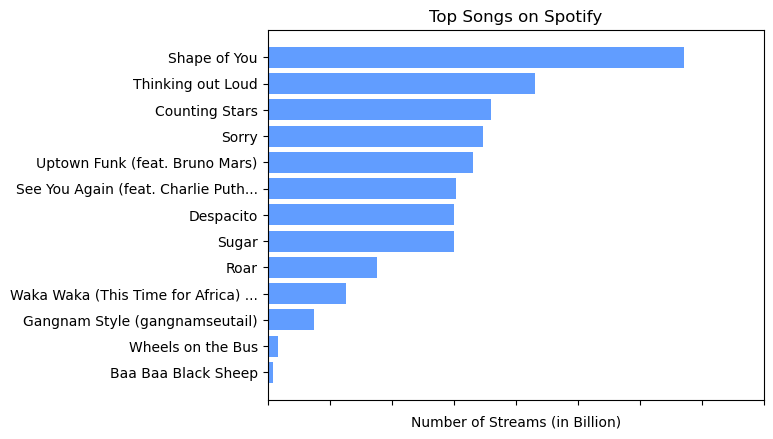

In [13]:
from unidecode import unidecode

# helper function to truncate the song title
def truncate(text):
    maxLen = 33
    if(len(text) > maxLen):
        return unidecode(text[0:maxLen] + "...")
    else:
        return unidecode(text)
    
# filter the top 15 songs based on the number of Streams
topSongs = df.nlargest(15, "Views", keep="all").drop_duplicates("Track").sort_values("Stream")
topSongs['Track'] = topSongs['Track'].map(truncate)

# plot songs in a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(topSongs["Track"], topSongs["Stream"], color="#619DFF")
ax.xaxis.set_ticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Top Songs on Spotify")
ax.set_xlabel("Number of Streams (in Billion)")

plt.show()

We can also analyze the top music videos based on the number of views on **YouTube**:

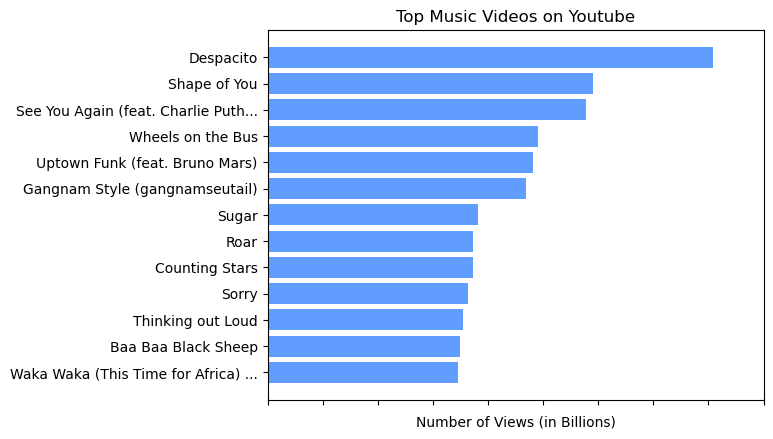

In [14]:
# filter the top 15 music videos based on the number of Views
topSongs = df.nlargest(15, "Views", keep="all").drop_duplicates("Track").sort_values("Views")
topSongs['Track'] = topSongs['Track'].map(truncate)

# plot music videos in a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(topSongs["Track"], topSongs["Views"], color="#619DFF")
ax.xaxis.set_ticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Top Music Videos on Youtube")
ax.set_xlabel("Number of Views (in Billions)")

plt.show()

<a name="visualizing"></a>
## Visualizing the Distribution of Song Characteristics

The dataset contains many features for each song. We can explore the distribution of some of these features, such as **danceability**, **energy**, **loudness**, and more, by **plotting histograms**:

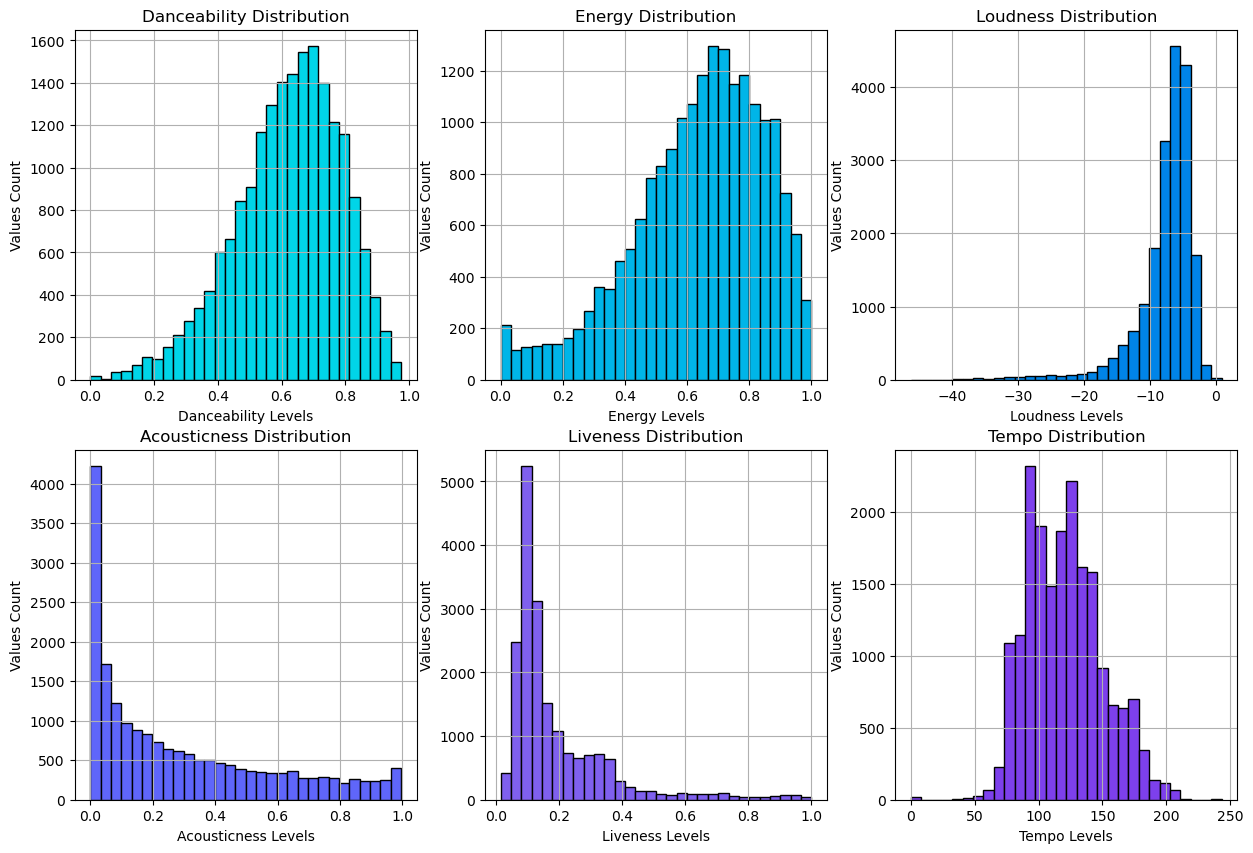

In [15]:
fig, axs = plt.subplots(2,3,figsize=(15,10))

binSize = 30

axs[0,0].hist(df["Danceability"], binSize, color = "#00d5e8", ec="black")
axs[0,0].set_title("Danceability Distribution")
axs[0,0].set_xlabel("Danceability Levels")
axs[0,0].set_ylabel("Values Count")
axs[0,0].grid(True)

axs[0,1].hist(df["Energy"], binSize, color = "#00b5e8", ec="black")
axs[0,1].set_title("Energy Distribution")
axs[0,1].set_xlabel("Energy Levels")
axs[0,1].set_ylabel("Values Count")
axs[0,1].grid(True)

axs[0,2].hist(df["Loudness"], binSize, color = "#0084e8", ec="black")
axs[0,2].set_title("Loudness Distribution")
axs[0,2].set_xlabel("Loudness Levels")
axs[0,2].set_ylabel("Values Count")
axs[0,2].grid(True)

axs[1,0].hist(df["Acousticness"], binSize, color = "#5f66fa", ec="black")
axs[1,0].set_title("Acousticness Distribution")
axs[1,0].set_xlabel("Acousticness Levels")
axs[1,0].set_ylabel("Values Count")
axs[1,0].grid(True)

axs[1,1].hist(df["Liveness"], binSize, color = "#7f60ee", ec="black")
axs[1,1].set_title("Liveness Distribution")
axs[1,1].set_xlabel("Liveness Levels")
axs[1,1].set_ylabel("Values Count")
axs[1,1].grid(True)

axs[1,2].hist(df["Tempo"], binSize, color = "#7d40ec", ec="black")
axs[1,2].set_title("Tempo Distribution")
axs[1,2].set_xlabel("Tempo Levels")
axs[1,2].set_ylabel("Values Count")
axs[1,2].grid(True)

plt.show()

<a name="analyzing_relationships"></a>

## Analyzing Relationships Between Song Features and Popularity

Next, we analyze the relationships between **song features** (e.g., loudness or tempo) and their **popularity** (streams or views):

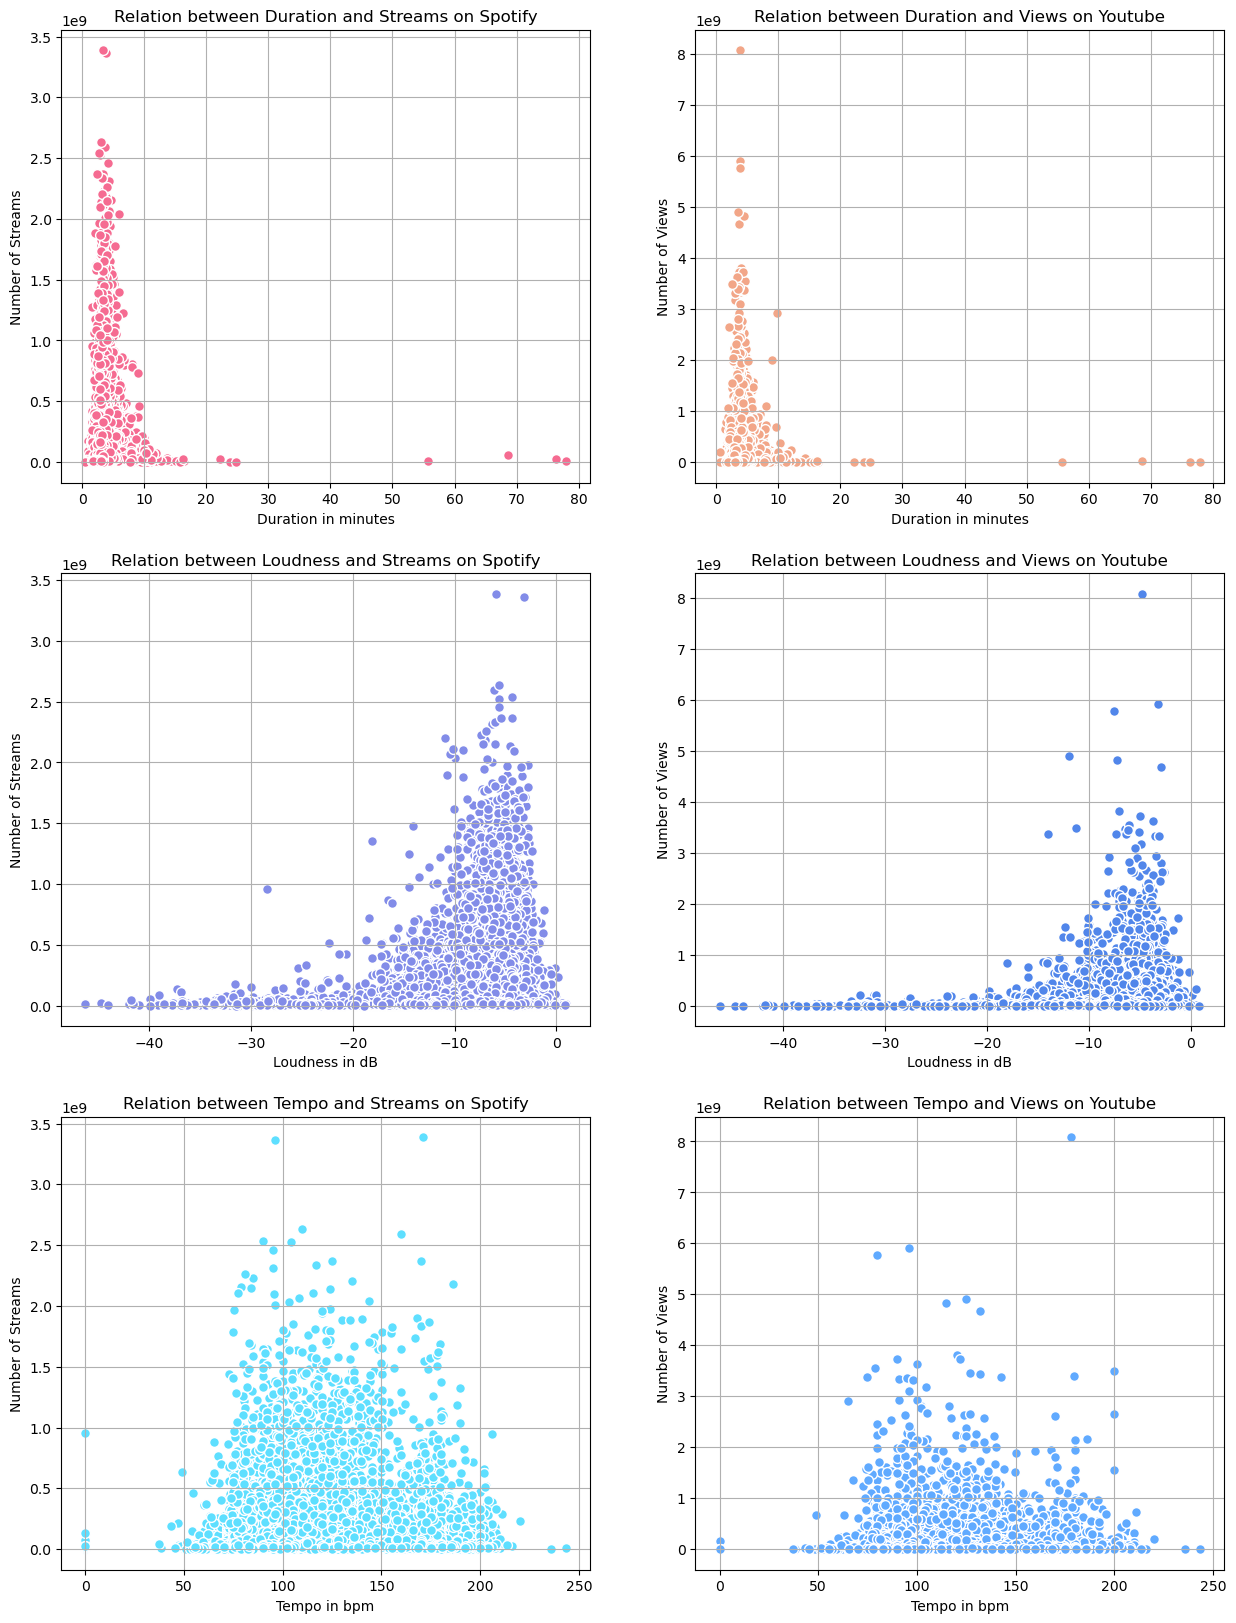

In [ ]:
fig, axs=plt.subplots(3,2,figsize=(15,20))

axs[0,0].scatter(df["Duration_ms"]/60000, df["Stream"], color = "#F56B91", ec="white", s=50)
axs[0,0].set_xlabel("Duration in minutes")
axs[0,0].set_ylabel("Number of Streams")
axs[0,0].set_title("Relation between Duration and Streams on Spotify")
axs[0,0].grid(True)

axs[0,1].scatter(df["Duration_ms"]/60000, df["Views"], color = "#F2A688", ec="white", s=50)
axs[0,1].set_xlabel("Duration in minutes")
axs[0,1].set_ylabel("Number of Views")
axs[0,1].set_title("Relation between Duration and Views on Youtube")
axs[0,1].grid(True)

axs[1,0].scatter(df["Loudness"], df["Stream"], color = "#828CE8", ec="white", s=50)
axs[1,0].set_xlabel("Loudness in dB")
axs[1,0].set_ylabel("Number of Streams")
axs[1,0].set_title("Relation between Loudness and Streams on Spotify")
axs[1,0].grid(True)

axs[1,1].scatter(df["Loudness"], df["Views"], color = "#5186EA", ec="white", s=50)
axs[1,1].set_xlabel("Loudness in dB")
axs[1,1].set_ylabel("Number of Views")
axs[1,1].set_title("Relation between Loudness and Views on Youtube")
axs[1,1].grid(True)

axs[2,0].scatter(df["Tempo"], df["Stream"], color = "#5EDFFF", ec="white", s=50)
axs[2,0].set_xlabel("Tempo in bpm")
axs[2,0].set_ylabel("Number of Streams")
axs[2,0].set_title("Relation between Tempo and Streams on Spotify")
axs[2,0].grid(True)

axs[2,1].scatter(df["Tempo"], df["Views"], color = "#60AAFF", ec="white", s=50)
axs[2,1].set_xlabel("Tempo in bpm")
axs[2,1].set_ylabel("Number of Views")
axs[2,1].set_title("Relation between Tempo and Views on Youtube")
axs[2,1].grid(True)

plt.show()

---
# [Summary](#top)

Within this notebook, you were introduced to the fundamentals of `Python`. Key concepts covered include:
* [Running Code in JupyterLab](#coderunning)
* [Course Overview](#course)
* [Analyzing Song Data](#songs_statistics)
  * [Data Preprocessing](#data_preprocessing)
  * [Visualizing the Distribution of Song Characteristics](#visualizing)
  * [Analyzing Relationships Between Song Features and Popularity](#analyzing_relationships)

The [next lecture](01_Intro.ipynb) will delve deeper into data structures in `Python`, building on these essential concepts.